# Cells for Google Colab

In [1]:
import os
runningFromColab = False
if 'CGROUP_MEMORY_EVENTS' in os.environ and 'colab' in os.environ['CGROUP_MEMORY_EVENTS']:
  runningFromColab = True

In [2]:
if runningFromColab:
  from google.colab import drive
  drive.mount('/content/drive')

In [3]:
if runningFromColab:
  %cd /content/drive/MyDrive/ColabProjects

In [4]:
if runningFromColab:
  !git clone https://github.com/OdyAsh/dl-water-crystals-synthesis-super-resolution.git

In [5]:
if runningFromColab:
  %cd /content/drive/MyDrive/ColabProjects/dl-water-crystals-synthesis-super-resolution

In [6]:
if runningFromColab:
  !git pull
  # if it DOES NOT say "Already up to date.", then you need to close this notebook file (i.e., the browser tab) and open it again for it to change 

In [7]:
if runningFromColab:
  !pip install huggingface-hub
  !pip install datasets
  !pip install diffusers[training]==0.11.1
  !pip install accelerate
  !pip install Augmentor
  # install Git-LFS to upload the model checkpoints
  !sudo apt -qq install git-lfs
  !git config --global credential.helper store

In [8]:
# if runningFromColab:
#   try:
#     import condacolab
#     condacolab.install()
#   except:
#     !pip install -q condacolab
#     import condacolab
#     condacolab.install()
#     # now restart the kernel

In [9]:
# if runningFromColab:
#   !conda env create -f environment.yml
#   # !conda update conda -y -q
#   # !source /usr/local/etc/profile.d/conda.sh
#   # !conda init 
#   # !conda install -n root _license -y -q
#   # !source activate myenv

In [10]:
# if runningFromColab:
#   import sys
#   sys.path.insert(0, '/usr/local/bin/conda')

# Imports

In [11]:
from huggingface_hub import notebook_login, login
from secretss import * # create secrets.py in same directory as this ipynb file, and add a line huggingface_token = "ASH_TOKEN_ASK_HIM"
# also, make sure secretss is double s, to avoid numpy conflicts. Source: https://stackoverflow.com/questions/73055157/what-does-importerror-cannot-import-name-randbits-mean#:~:text=Somehow%20anaconda3/Lib/secrets.py%20got%20overwritten
login(huggingface_token, add_to_git_credential=True) # ^^^^^^^^^^^^^^^^^^^^^

Token is valid.
Your token has been saved in your configured git credential helpers (manager-core,store).
Your token has been saved to C:\Users\ashra\.cache\huggingface\token
Login successful


# Configuring Training Variables in `config`

In [12]:
import torch
print(torch.cuda.is_available())

True


In [13]:
torch.cuda.empty_cache() # to free up gpu memory space if you've ran the model before (doesn't completly free memory though; you have to restart the kernel for that)

In [14]:
data_dir = './dataset/Microparticle/'

In [15]:
from dataclasses import dataclass


@dataclass
class TrainingConfig:
    image_size = 128  # the generated image resolution
    train_batch_size = 4
    eval_batch_size = 4  # how many images to sample during evaluation, if 4 --> make_grid() should have 1 row and 4 columns, and so on
    num_epochs = 100
    gradient_accumulation_steps = 4
    learning_rate = 1e-4
    lr_warmup_steps = 500                                                                                                               # 1k
    save_image_epochs = 10
    save_model_epochs = 10
    mixed_precision = "fp16"  # `no` for float32, `fp16` for automatic mixed precision
    output_dir = "./hf_ddpm_diffusion_microparticles_v2/"  # the model name locally and on the HF Hub

    push_to_hub = False  # whether to upload the saved model to the HF Hub
    hub_private_repo = False
    overwrite_output_dir = True  # overwrite the old model when re-running the notebook
    seed = 0


config = TrainingConfig()

In [27]:
# pulling model changes from huggingface

from pathlib import Path
from huggingface_hub import HfFolder, Repository, whoami
def get_full_repo_name(model_id: str, organization: str = None, token: str = None):
    if token is None:
        token = HfFolder.get_token()
    if organization is None:
        username = whoami(token)["name"]
        return f"{username}/{model_id}"
    else:
        return f"{organization}/{model_id}"
repo_name = get_full_repo_name(Path(config.output_dir).name)
repo = Repository(config.output_dir, clone_from=repo_name)
repo.git_pull()

# # pushing model changes to huggingface (don't run if you don't want to push)
# repo.push_to_hub(commit_message=f"test", blocking=True)

d:\CS\projects\dl-water-crystals-synthesis-super-resolution\./hf_ddpm_diffusion_microparticles_v2/ is already a clone of https://huggingface.co/OdyAsh/hf_ddpm_diffusion_microparticles_v2. Make sure you pull the latest changes with `repo.git_pull()`.
Adding files tracked by Git LFS: ['samples/0009.png', 'samples/0019.png', 'samples/0029.png', 'samples/0039.png', 'samples/0049.png', 'samples/0059.png', 'samples/0069.png', 'samples/0079.png', 'samples/0089.png', 'samples/0099.png']. This may take a bit of time if the files are large.


Upload file unet/diffusion_pytorch_model.bin:   0%|          | 1.00/434M [00:00<?, ?B/s]

Upload file samples/0069.png:   0%|          | 1.00/140k [00:00<?, ?B/s]

Upload file samples/0009.png:   0%|          | 1.00/193k [00:00<?, ?B/s]

Upload file samples/0019.png:   0%|          | 1.00/150k [00:00<?, ?B/s]

Upload file samples/0029.png:   0%|          | 1.00/133k [00:00<?, ?B/s]

Upload file samples/0049.png:   0%|          | 1.00/127k [00:00<?, ?B/s]

Upload file samples/0099.png:   0%|          | 1.00/125k [00:00<?, ?B/s]

Upload file samples/0039.png:   0%|          | 1.00/131k [00:00<?, ?B/s]

Upload file samples/0059.png:   0%|          | 1.00/114k [00:00<?, ?B/s]

Upload file samples/0089.png:   0%|          | 1.00/102k [00:00<?, ?B/s]

Upload file samples/0079.png:   0%|          | 1.00/95.1k [00:00<?, ?B/s]

Upload file logs/train_example/events.out.tfevents.1681407465.LAPTOP-RE72OONJ.27436.0:   0%|          | 1.00/1…

To https://huggingface.co/OdyAsh/hf_ddpm_diffusion_microparticles_v2
   99b71da..48761e5  main -> main



'https://huggingface.co/OdyAsh/hf_ddpm_diffusion_microparticles_v2/commit/48761e584f11560358807d5b6d9aa8d9d80a4c40'

# Importing Data

In [17]:
from datasets import load_dataset

config.dataset_name = data_dir
dataset = load_dataset(config.dataset_name, split="train")

#  # equivalent to writing:
# config.dataset_name = "imagefolder"
# dataset = load_dataset(config.dataset_name, split="train", data_dir=data_dir)

# to get list of image paths (absolute paths from drive letter till filename):
# list(dataset.download_checksums.keys())

Resolving data files:   0%|          | 0/149 [00:00<?, ?it/s]

Found cached dataset imagefolder (C:/Users/ashra/.cache/huggingface/datasets/imagefolder/Microparticle-d382bc7e49017b2c/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f)


C:\Users\ashra\AppData\Local\Temp\ipykernel_2684\3278871621.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


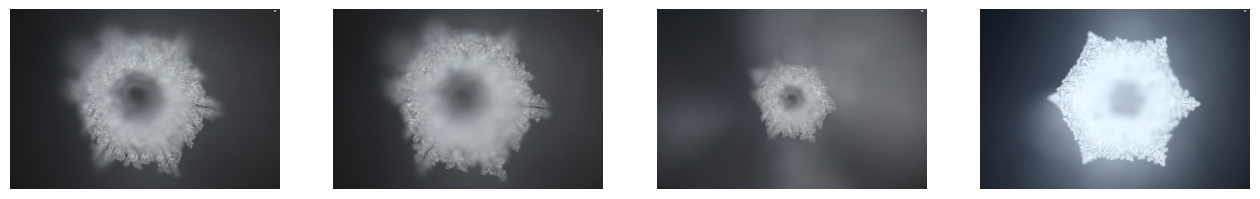

In [18]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 4, figsize=(16, 4))
for i, image in enumerate(dataset[:4]["image"]):
    axs[i].imshow(image)
    axs[i].set_axis_off()
fig.show()

# Preparing Preprocessing & DataLoader Functions

In [19]:
import Augmentor
aug_pipeline = Augmentor.Pipeline(data_dir)
aug_pipeline.rotate(probability=0.5, max_left_rotation=5, max_right_rotation=5)
aug_pipeline.flip_left_right(probability=0.5)
aug_pipeline.zoom(probability=0.5, min_factor=1.1, max_factor=1.2) # assumes water crystal is always in center of image; always zooms in
aug_pipeline.flip_top_bottom(probability=0.5)
# aug_pipeline.random_distortion(probability=0.5, grid_width=4, grid_height=4, magnitude=2) # will not augment this way, as it will change structure of crystal

# Run for debugging purposes to see what the transformations could look like 
# By default these will be written to the disk in a directory named "output" which will be inside data_dir path
# aug_pipeline.sample(100) 

Initialised with 149 image(s) found.
Output directory set to ./dataset/Microparticle/output.

In [20]:
from torchvision import transforms

preprocess_pipeline = transforms.Compose(
    [
        transforms.Resize((config.image_size, config.image_size)),
        # aug_pipeline.torch_transform(),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5]),
    ]
)

In [21]:
def transform(examples):
    images = [preprocess_pipeline(image.convert("RGB")) for image in examples["image"]]
    return {"images": images}


dataset.set_transform(transform) 
# 
# Explanation note:
# set_transform(func) applies a custom formatting transform on-the-fly. This function replaces any previously specified format of the images.
# also, func is only applied when examples are accessed
# so if you don't run the line above, and print "dataset", you'll get:
#
# {'type': 'custom',
#  'format_kwargs': {},
#  'columns': ['image'],
#  'output_all_columns': False}
#
# and accessing an image, e.g., dataset[0], you'll get:
# 
# {'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=5472x3648>}
#
# However, running the set_transform() function will give you the following for dataset, dataset[0], and dataset[0]['images'].shape respectively:
#
# {'type': 'custom',
#  'format_kwargs': {'transform': <function __main__.transform(examples)>},
#  'columns': ['image'],
#  'output_all_columns': False}
#
# 
# {'images': tensor([[[-0.7098, -0.7176, -0.7098,  ..., -0.7255, -0.7333, -0.7255],
#           [-0.7098, -0.7020, -0.7020,  ..., -0.7255, -0.7176, -0.7176],
#           ...,
#           [-0.5686, -0.5608, -0.5529,  ..., -0.5137, -0.5294, -0.5294]]])}
#
#
# torch.Size([3, 128, 128])
# 
# noting that if you've written dataset[:2]['images'], it would've returned {'images': [tensor(...), tensor(...)]} 
# in other words, the key "images" is written once, and instead of returning tensor(), it will return list of tensors
# confusingly, if you index it like this: dataset[:1]['images'], it will return {'images': [tensor(...)]}, NOT {'images': tensor(...)}
#
# all of the logic said above applies also if you didn't run set_transform(), just replace 'images' with 'image', and 'tensor()' with <PIL> object
#

C:\Users\ashra\AppData\Local\Temp\ipykernel_2684\1866579057.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


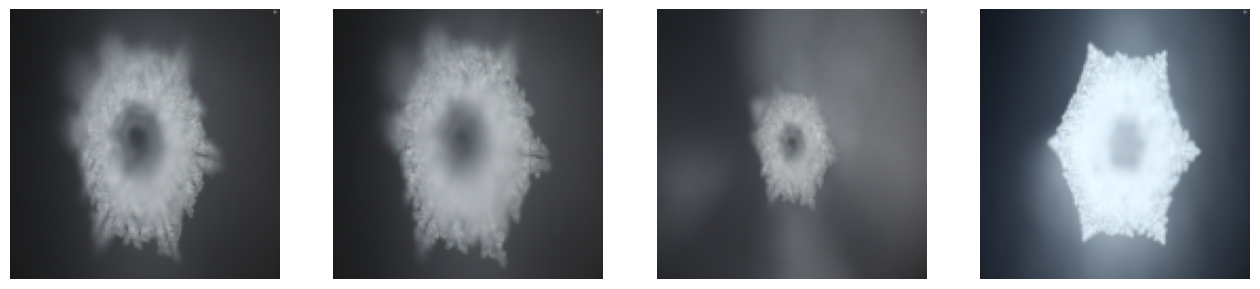

In [22]:
# Let's see what they look like now
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
for i, image in enumerate(dataset[:4]["images"]):
    # image = preprocess_pipeline(image.convert("RGB"))
    axs[i].imshow(image.permute(1, 2, 0).numpy() / 2 + 0.5)
    axs[i].set_axis_off()
fig.show()

In [23]:
# Setup the batch sampler class to take in a manually-specified number of image batches per epoch, instead of being automatically calculated as ceil(dataset_samples / batch_size)
import torch

class BatchSampler(torch.utils.data.sampler.Sampler):
    def __init__(self, data_source, batch_size, num_batches, shuffle=True):
      self.data_source = data_source
      self.batch_size = batch_size
      self.num_batches = num_batches
      self.shuffle = shuffle

    def __iter__(self):
      # the __iter__ method returns the indices of the samples
      for i in range(self.num_batches):
        if self.shuffle:
            batch_indices = torch.randperm(len(self.data_source))[:self.batch_size].tolist() # generates a random permutation of integers from 0 to len(self.data_source) - 1.
        else:
            start_index = i * self.batch_size
            end_index = min(len(self.data_source), (i + 1) * self.batch_size) # doing min() to avoid IndexOutOfBounds error
            batch_indices = list(range(start_index, end_index))
        yield batch_indices

    def __len__(self):
      return self.num_batches


In [24]:
# Now that all our images have the same size and are converted to tensors, we can create the dataloader we will use for training.
num_batches = len(dataset) // config.train_batch_size + (len(dataset) % config.train_batch_size != 0)
batch_sampler = BatchSampler(dataset, config.train_batch_size, num_batches, shuffle=True)
train_dataloader = torch.utils.data.DataLoader(dataset, batch_sampler=batch_sampler)

In [26]:
from diffusers import UNet2DModel

model = UNet2DModel(
    sample_size=config.image_size,  # the target image resolution
    in_channels=3,  # the number of input channels, 3 for RGB images
    out_channels=3,  # the number of output channels
    layers_per_block=2,  # how many ResNet layers to use per UNet block
    block_out_channels=(128, 128, 256, 256, 512, 512),  # the number of output channels for each UNet block
    down_block_types=(
        "DownBlock2D",  # a regular ResNet downsampling block
        "DownBlock2D",
        "DownBlock2D",
        "DownBlock2D",
        "AttnDownBlock2D",  # a ResNet downsampling block with spatial self-attention
        "DownBlock2D",
    ),
    up_block_types=(
        "UpBlock2D",  # a regular ResNet upsampling block
        "AttnUpBlock2D",  # a ResNet upsampling block with spatial self-attention
        "UpBlock2D",
        "UpBlock2D",
        "UpBlock2D",
        "UpBlock2D",
    ),
)

In [27]:
sample_image = dataset[0]["images"].unsqueeze(0)
print("Input shape:", sample_image.shape)

print("Output shape:", model(sample_image, timestep=0).sample.shape)

Input shape: torch.Size([1, 3, 128, 128])
Output shape: torch.Size([1, 3, 128, 128])


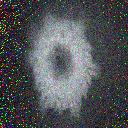

In [28]:
import torch
from PIL import Image
from diffusers import DDPMScheduler

noise_scheduler = DDPMScheduler(num_train_timesteps=1000)
noise = torch.randn(sample_image.shape)
timesteps = torch.LongTensor([50])
noisy_image = noise_scheduler.add_noise(sample_image, noise, timesteps)

Image.fromarray(((noisy_image.permute(0, 2, 3, 1) + 1.0) * 127.5).type(torch.uint8).numpy()[0])

In [29]:
import torch.nn.functional as F

noise_pred = model(noisy_image, timesteps).sample
loss = F.mse_loss(noise_pred, noise)

In [30]:
from diffusers.optimization import get_cosine_schedule_with_warmup

optimizer = torch.optim.AdamW(model.parameters(), lr=config.learning_rate)
lr_scheduler = get_cosine_schedule_with_warmup(
    optimizer=optimizer,
    num_warmup_steps=config.lr_warmup_steps,
    num_training_steps=(len(train_dataloader) * config.num_epochs),
)

In [30]:
from diffusers import DDPMPipeline
import math
import os


def make_grid(images, rows, cols):
    w, h = images[0].size
    grid = Image.new("RGB", size=(cols * w, rows * h))
    for i, image in enumerate(images):
        grid.paste(image, box=(i % cols * w, i // cols * h))
    return grid


def evaluate(config, epoch, pipeline):
    # Sample some images from random noise (this is the backward diffusion process).
    # The default pipeline output type is `List[PIL.Image]`
    images = pipeline(
        batch_size=config.eval_batch_size,
        generator=torch.manual_seed(config.seed),
    ).images

    # Make a grid out of the images # to do: change rows, cols to 4, 4 if batch becomes 16
    image_grid = make_grid(images, rows=2, cols=2)

    # Save the images
    test_dir = os.path.join(config.output_dir, "samples")
    os.makedirs(test_dir, exist_ok=True)
    image_grid.save(f"{test_dir}/{epoch:04d}.png")

In [31]:
from accelerate import Accelerator
from huggingface_hub import HfFolder, Repository, whoami
from tqdm.auto import tqdm
from pathlib import Path
import os


def get_full_repo_name(model_id: str, organization: str = None, token: str = None):
    if token is None:
        token = HfFolder.get_token()
    if organization is None:
        username = whoami(token)["name"]
        return f"{username}/{model_id}"
    else:
        return f"{organization}/{model_id}"


def train_loop(config, model, noise_scheduler, optimizer, train_dataloader, lr_scheduler):
    # Initialize accelerator and tensorboard logging
    accelerator = Accelerator(
        mixed_precision=config.mixed_precision,
        gradient_accumulation_steps=config.gradient_accumulation_steps,
        log_with="tensorboard",
        logging_dir=os.path.join(config.output_dir, "logs"),
    )
    if accelerator.is_main_process:
        if config.push_to_hub:
            repo_name = get_full_repo_name(Path(config.output_dir).name)
            repo = Repository(config.output_dir, clone_from=repo_name)
        elif config.output_dir is not None:
            os.makedirs(config.output_dir, exist_ok=True)
        accelerator.init_trackers("train_example")

    # Prepare everything
    # There is no specific order to remember, you just need to unpack the
    # objects in the same order you gave them to the prepare method.
    model, optimizer, train_dataloader, lr_scheduler = accelerator.prepare(
        model, optimizer, train_dataloader, lr_scheduler
    )

    global_step = 0

    # Now you train the model
    for epoch in range(config.num_epochs):
        progress_bar = tqdm(total=len(train_dataloader), disable=not accelerator.is_local_main_process)
        progress_bar.set_description(f"Epoch {epoch}")

        for step, batch in enumerate(train_dataloader):
            clean_images = batch["images"]
            # Sample noise to add to the images
            noise = torch.randn(clean_images.shape).to(clean_images.device)
            bs = clean_images.shape[0]

            # Sample a random timestep for each image
            timesteps = torch.randint(
                0, noise_scheduler.num_train_timesteps, (bs,), device=clean_images.device
            ).long()

            # Add noise to the clean images according to the noise magnitude at each timestep
            # (this is the forward diffusion process)
            noisy_images = noise_scheduler.add_noise(clean_images, noise, timesteps)

            with accelerator.accumulate(model):
                # Predict the noise residual
                noise_pred = model(noisy_images, timesteps, return_dict=False)[0]
                loss = F.mse_loss(noise_pred, noise)
                accelerator.backward(loss)

                # draft; never run (supposed draft: run this only when gradient_accumulation_steps > 1:)
                # accelerator.unscale_gradients(optimizer)

                # accelerator.clip_grad_norm_(model.parameters(), 1.0) # comment this out only when gradient_accumulation_steps > 1:
                optimizer.step()
                lr_scheduler.step()
                optimizer.zero_grad()

            progress_bar.update(1)
            global_step += 1

        logs = {"loss": loss.detach().item(), "lr": lr_scheduler.get_last_lr()[0], "step": epoch}
        progress_bar.set_postfix(**logs)
        accelerator.log(logs, step=epoch)
            

        # After each epoch you optionally sample some demo images with evaluate() and save the model
        if accelerator.is_main_process:
            pipeline = DDPMPipeline(unet=accelerator.unwrap_model(model), scheduler=noise_scheduler)

            if (epoch + 1) % config.save_image_epochs == 0 or epoch == config.num_epochs - 1:
                evaluate(config, epoch, pipeline)

            if (epoch + 1) % config.save_model_epochs == 0 or epoch == config.num_epochs - 1:
                if config.push_to_hub:
                    repo.push_to_hub(commit_message=f"Epoch {epoch}", blocking=True)
                else:
                    pipeline.save_pretrained(config.output_dir)

In [32]:
from accelerate import notebook_launcher

args = (config, model, noise_scheduler, optimizer, train_dataloader, lr_scheduler)

torch.cuda.empty_cache()

notebook_launcher(train_loop, args, num_processes=1)

torch.cuda.empty_cache()

# explanation note: when you see 0/batches_num to the right of the progress bar, "batches_num" here refers to len(train_dataloader), 
# which corresponds to the number of batches that the model will train on,
# and batches_num is calculated using --> ceil(dataset_samples / batch_size)
# such that:
#   dataset_samples --> number of images loaded into "dataset" variable --> len(dataset)
#   batch_size --> number of images trained simultaneously by the model --> config.train_batch_size

# however, you can manually pass batches_num that you want done per epoch using Dataloader()'s "batch_sampler" argument 

Launching training on one GPU.


d:\CS\projects\dl-water-crystals-synthesis-super-resolution\.venv\lib\site-packages\accelerate\accelerator.py:243: FutureWarning: `logging_dir` is deprecated and will be removed in version 0.18.0 of 🤗 Accelerate. Use `project_dir` instead.
  warnings.warn(


  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Training Output:

<img src='./project_media_2/ddpm_v2_training_output.png' />

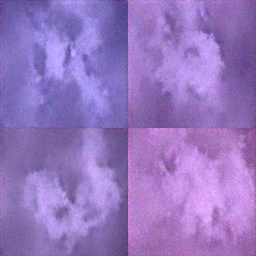

In [32]:
import glob

sample_images = sorted(glob.glob(f"{config.output_dir}/samples/*.png"))
Image.open(sample_images[-1])

In [35]:
from tensorboard import notebook
notebook.start('--logdir=./hf_ddpm_diffusion_microparticles_v2/logs/ --port 6014')
# now, go here to view output: http://localhost:6014/

In [ ]:
################ DRAFT: #####################
from accelerate import Accelerator
from huggingface_hub import HfFolder, Repository, whoami
from tqdm.auto import tqdm
from pathlib import Path
import os


def get_full_repo_name(model_id: str, organization: str = None, token: str = None):
    if token is None:
        token = HfFolder.get_token()
    if organization is None:
        username = whoami(token)["name"]
        return f"{username}/{model_id}"
    else:
        return f"{organization}/{model_id}"


def train_loop(config, model, noise_scheduler, optimizer, train_dataloader, lr_scheduler):
    # Initialize accelerator and tensorboard logging
    accelerator = Accelerator(
        mixed_precision=config.mixed_precision,
        # gradient_accumulation_steps=config.gradient_accumulation_steps,
        log_with="tensorboard",
        logging_dir=os.path.join(config.output_dir, "logs"),
    )
    if accelerator.is_main_process:
        if config.push_to_hub:
            repo_name = get_full_repo_name(Path(config.output_dir).name)
            repo = Repository(config.output_dir, clone_from=repo_name)
        elif config.output_dir is not None:
            os.makedirs(config.output_dir, exist_ok=True)
        accelerator.init_trackers("train_example")

    # Prepare everything
    # There is no specific order to remember, you just need to unpack the
    # objects in the same order you gave them to the prepare method.
    model, optimizer, train_dataloader, lr_scheduler = accelerator.prepare(
        model, optimizer, train_dataloader, lr_scheduler
    )

    global_step = 0

    # Now you train the model
    for epoch in range(config.num_epochs):
        progress_bar = tqdm(total=len(train_dataloader), disable=not accelerator.is_local_main_process)
        progress_bar.set_description(f"Epoch {epoch}")

        for step, batch in enumerate(train_dataloader):
            clean_images = batch["images"]
            # Sample noise to add to the images
            noise = torch.randn(clean_images.shape).to(clean_images.device)
            bs = clean_images.shape[0]

            # Sample a random timestep for each image
            timesteps = torch.randint(
                0, noise_scheduler.num_train_timesteps, (bs,), device=clean_images.device
            ).long()

            # Add noise to the clean images according to the noise magnitude at each timestep
            # (this is the forward diffusion process)
            noisy_images = noise_scheduler.add_noise(clean_images, noise, timesteps)

            # with accelerator.accumulate(model): # comment this when using gradient_accumulation_steps > 1

            # Predict the noise residual
            noise_pred = model(noisy_images, timesteps, return_dict=False)[0]
            loss = F.mse_loss(noise_pred, noise)
            loss = loss / config.gradient_accumulation_steps # add this when using gradient_accumulation_steps > 1
            accelerator.backward(loss)

            if (step+1) % config.gradient_accumulation_steps == 0: # add this when using gradient_accumulation_steps > 1
                accelerator.clip_grad_norm_(model.parameters(), 1.0) # comment this out only when gradient_accumulation_steps > 1:
                optimizer.step()
                lr_scheduler.step()
                optimizer.zero_grad()

            progress_bar.update(1)
            logs = {"loss": loss.detach().item(), "lr": lr_scheduler.get_last_lr()[0], "step": epoch}
            progress_bar.set_postfix(**logs)
            if (step == len(train_dataloader)-1):
                accelerator.log(logs, step=global_step)
            global_step += 1

        # After each epoch you optionally sample some demo images with evaluate() and save the model
        if accelerator.is_main_process:
            pipeline = DDPMPipeline(unet=accelerator.unwrap_model(model), scheduler=noise_scheduler)

            if (epoch + 1) % config.save_image_epochs == 0 or epoch == config.num_epochs - 1:
                evaluate(config, epoch, pipeline)

            if (epoch + 1) % config.save_model_epochs == 0 or epoch == config.num_epochs - 1:
                if config.push_to_hub:
                    repo.push_to_hub(commit_message=f"Epoch {epoch}", blocking=True)
                else:
                    pipeline.save_pretrained(config.output_dir)